In [ ]:
# !pip install mlxtend --upgrade
# http://rasbt.github.io/mlxtend/

In [1]:
import numpy as np
from sklearn.datasets import california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib.pylab import plt
from utils import *
%matplotlib inline
from mlxtend.regressor import StackingCVRegressor

In [2]:
data=california_housing.fetch_california_housing()
x=data.data
y=data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2121)

In [5]:
clf1_0 = Ridge(alpha=0.01)
clf1_1 = RandomForestRegressor(n_estimators=100,random_state=2121,n_jobs=-1)
clf1_2 = ExtraTreesRegressor(n_estimators=400,random_state=2121,n_jobs=-1)
clf1_3 = make_pipeline(MinMaxScaler(),MLPRegressor(hidden_layer_sizes=(20,20,20)))
clf1_4 = GradientBoostingRegressor(n_estimators=580,max_depth=4)

clf2_0 = Ridge(random_state=2112,alpha=0.01)

np.random.seed(2121)
clf = StackingCVRegressor(regressors=(clf1_0,clf1_1,clf1_2,clf1_3,clf1_4),
                            meta_regressor=clf2_0)

/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

MSE -  0.20492649924771367
MAE -  0.30150740595266223


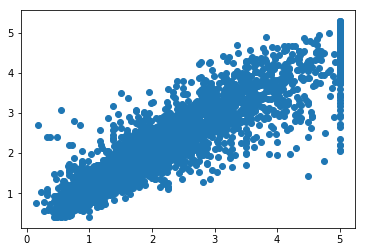

In [9]:
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
plt_sct(y_test,preds)